In [1]:
import os
import sys
import numpy as np
from chrmt_generator import TranscriptomeGenerator, TranscriptomePredictor
from chrmt_train import maximum_likelihood_loss
from tensorflow.keras.models import load_model
from tqdm import tqdm
from scipy.stats import spearmanr, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

RESOLUTION = 100
window_size = 41


Using TensorFlow backend.


In [2]:
# Prepare model to perform inference with
trained_model_path = "../Models/Run_Transcriptome_TSS_only_log10p1TPM_H3K27ac_only_transcriptome_41_32_6_0.0.model-200.hdf5"
trained_model = load_model(trained_model_path)

# trained_model_path = "../Models/Run_transcriptome_101_16_10_0.0_mle_genome_wide.model-150.hdf5"
# trained_model = load_model(trained_model_path, custom_objects={'maximum_likelihood_loss': maximum_likelihood_loss})


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Loading TSS data
TSS strand information is invalid
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr2.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr2.npy
Load

Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A07.chr2.npy
Transcriptome data missing /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr2.-.npy
Loading Epigenome data

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T11A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T11A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T11_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T11_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TP

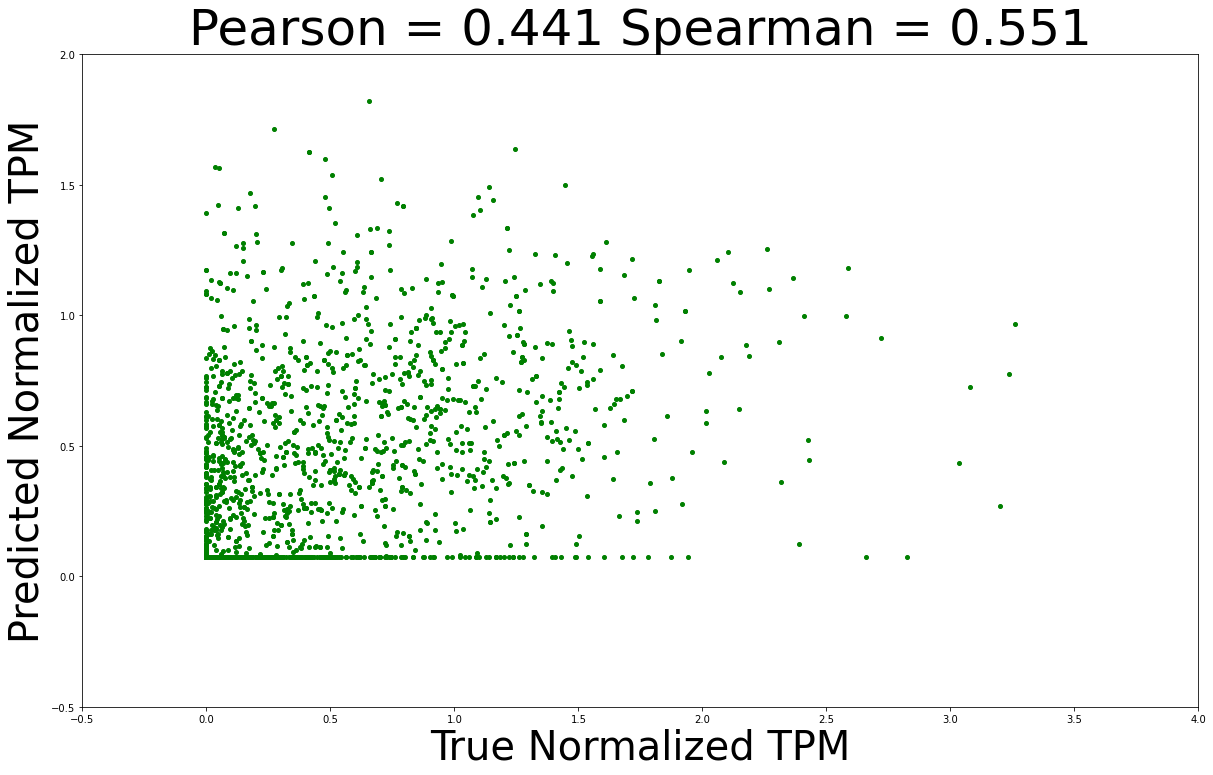

In [3]:
# Compute a true vs predicted spearman
test_generator = TranscriptomeGenerator(window_size,
                   1,
                   shuffle=False,
                   mode='testing'+'TSS_only',
                   masking_probability=0.0)

H3K27ac_max = []

np.set_printoptions(precision=3, suppress=True)
yTrue = []
yPred = []
for i in tqdm(range(2000)):

    X, Y = test_generator.__getitem__(i)

    H3K27ac_max.append(np.max(X[:, :, 2]))
    
    yPred_value = trained_model.predict(X)
#     print(yPred_value)
    yTrue.append(Y[0][0])
    yPred.append(yPred_value[0][0])
#     print(i, Y, yPred, np.asarray(yPred).shape, "\n")
# print(list(zip(yTrue, yPred)))

pc, _ = pearsonr(yTrue, yPred)
sc, _ = spearmanr(yTrue, yPred)
# print("Pearson =", round(pc, 3), "Spearman =", round(sc, 3))

plt.rcParams["figure.figsize"] = (20, 12)
plt.plot(yTrue, yPred, 'o', markersize=4, color='green')
plt.xlabel("True Normalized TPM", size=40)
plt.ylabel("Predicted Normalized TPM", size=40)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 2)
plt.title("Pearson = "+str(round(pc, 3))+" Spearman = "+str(round(sc, 3)), size=50)
plt.show()

In [4]:
# Pre-compute the epigenetic features for a few exemplar genes
STARTS = [136118149, 136116243, 99105113, 84905656, 33513875, 186694060]
STRANDS = ["-", "-", "+", "+", "+", "+"]
CHROMS = ["chr2", "chr2", "chr9", "chr2", "chr2", "chr2"]
GENES = ["CXCR4", "CXCR4_alternative", "TGFBR1", "High", "Low", "Medium"]

for gene_index in range(len(GENES)):
    prediction_generator = TranscriptomePredictor(window_size,
                           1,
                           shuffle=False,
                           mode='testing',
                           masking_probability=0.0,
                           cell_type=-1, # The last cell type in CELL_TYPES is T13
                           chrom=CHROMS[gene_index], start=int(STARTS[gene_index]/RESOLUTION), strand=STRANDS[gene_index])
                                              
    for i in range(1):
        X, Y = prediction_generator.__getitem__(i)
        print(X.shape, Y.shape)
        np.save(GENES[gene_index] + ".npy", X)

Loading TSS data
TSS strand information is invalid
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr2.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr2.npy
Load

Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A07.chr2.npy
Transcriptome data missing /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr2.-.npy
Loading Epigenome data

Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T11_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T11_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.-.npy
Loading Epigenome data

(1, 41, 6) (1, 1)


Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr2.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A07.chr2.npy
Transcriptome data missing /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

(1, 41, 6) (1, 1)


Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A07.chr2.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T02_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T02_TPM.chr2.-.npy
Loading Epigenome data

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A07.chr9.npy
Transcriptome data missing /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr9.-.npy
Batch Number 0 991051 chr9 991051 +
Loading TSS data
TSS strand information is invalid
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Da

(1, 41, 6) (1, 1)


Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A07.chr2.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T02_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T02_TPM.chr2.-.npy
Loading Epigenome data

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A07.chr9.npy
Transcriptome data missing /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/G

(1, 41, 6) (1, 1)


Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A07.chr2.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T02_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T02_TPM.chr2.-.npy
Loading Epigenome data

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A07.chr9.npy
Transcriptome data missing /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr9.-.npy
Batch Number 0 335138 

(1, 41, 6) (1, 1)


Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A07.chr2.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T01_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T02A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A02.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A03.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A04.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A05.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A06.chr2.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A07.chr2.npy
Transcriptome data missing /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr2.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T13_TPM.chr2.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T01A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A05.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A06.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T12A07.chr9.npy
Loading Transcriptome data /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.+.npy /scratch/sanjit/ENCODE_Imputation_Challenge/2_April_2020/Data/Gene_Expression/genome_wide_TPM_npy/T12_TPM.chr9.-.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A02.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A03.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_2020/T13A04.chr9.npy
Loading Epigenome data ../Data/100bp_12_7_Data_20_July_

(1, 41, 6) (1, 1)


Batch Number 0 1866940 chr2 1866940 +


In [5]:
# Load Alan's H3K27ac p300 dataset
df_CXCR4 = pd.read_csv("../Data/CXCR4.p300.tsv", sep="\t")
df_CXCR4_values = df_CXCR4[df_CXCR4['Position_wrt_TSS']!="Control"]
df_CXCR4_values["Position_wrt_TSS"] = pd.to_numeric(df_CXCR4_values["Position_wrt_TSS"], errors='coerce')/RESOLUTION

df_TGFBR1 = pd.read_csv("../Data/TGFBR1.p300.tsv", sep="\t")
df_TGFBR1_values = df_TGFBR1[df_TGFBR1['Position_wrt_TSS']!="Control"]
df_TGFBR1_values["Position_wrt_TSS"] = pd.to_numeric(df_TGFBR1_values["Position_wrt_TSS"], errors='coerce')/RESOLUTION
df_TGFBR1_values

/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Position_wrt_TSS,Fold_Change
0,-19.69,1.724330
1,-19.69,1.381576
2,-19.69,1.180747
3,-19.69,1.312039
4,-19.69,1.198220
...,...,...
147,18.49,1.726966
148,18.49,1.093041
149,18.49,1.079456
150,18.49,1.100834


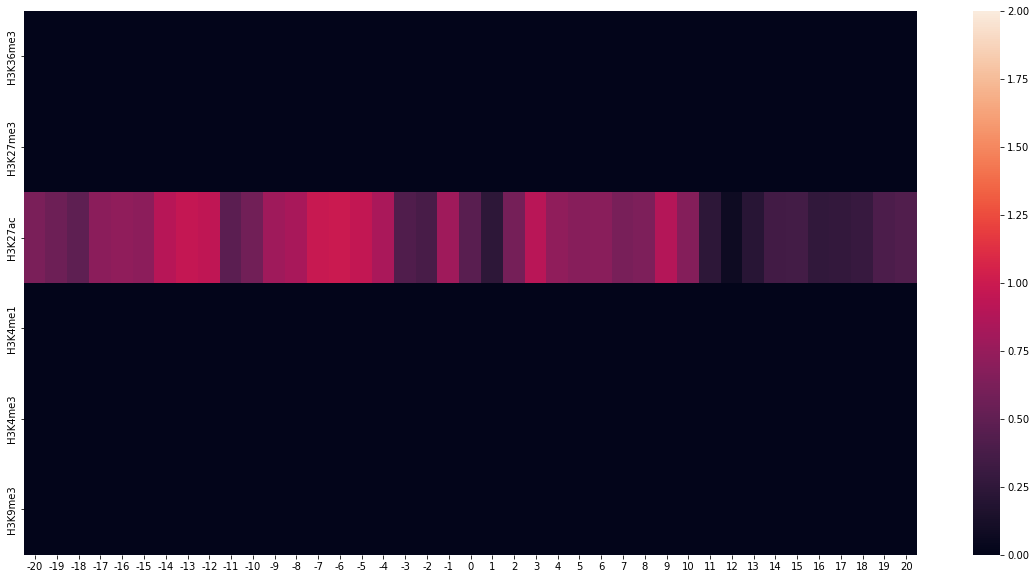

/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator


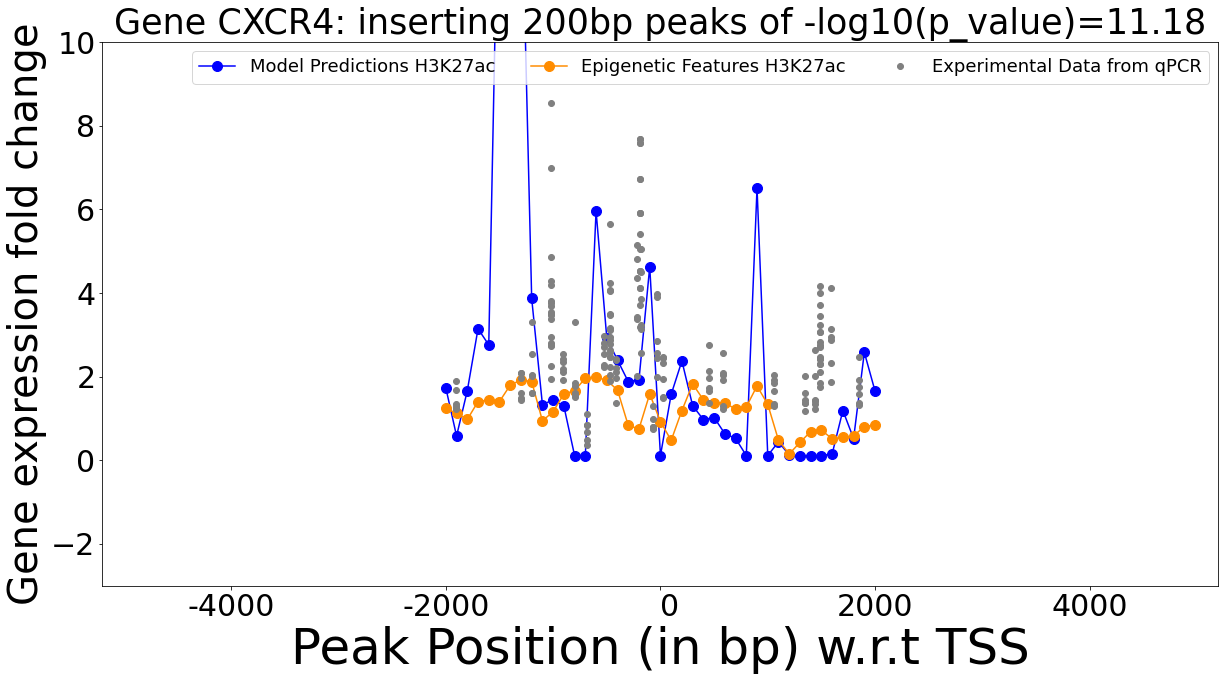

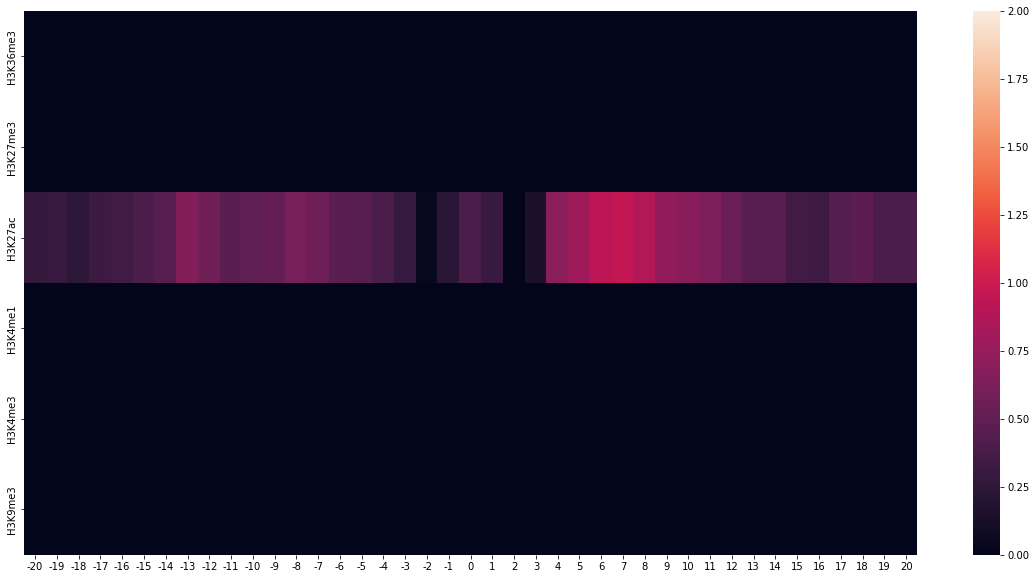

/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator


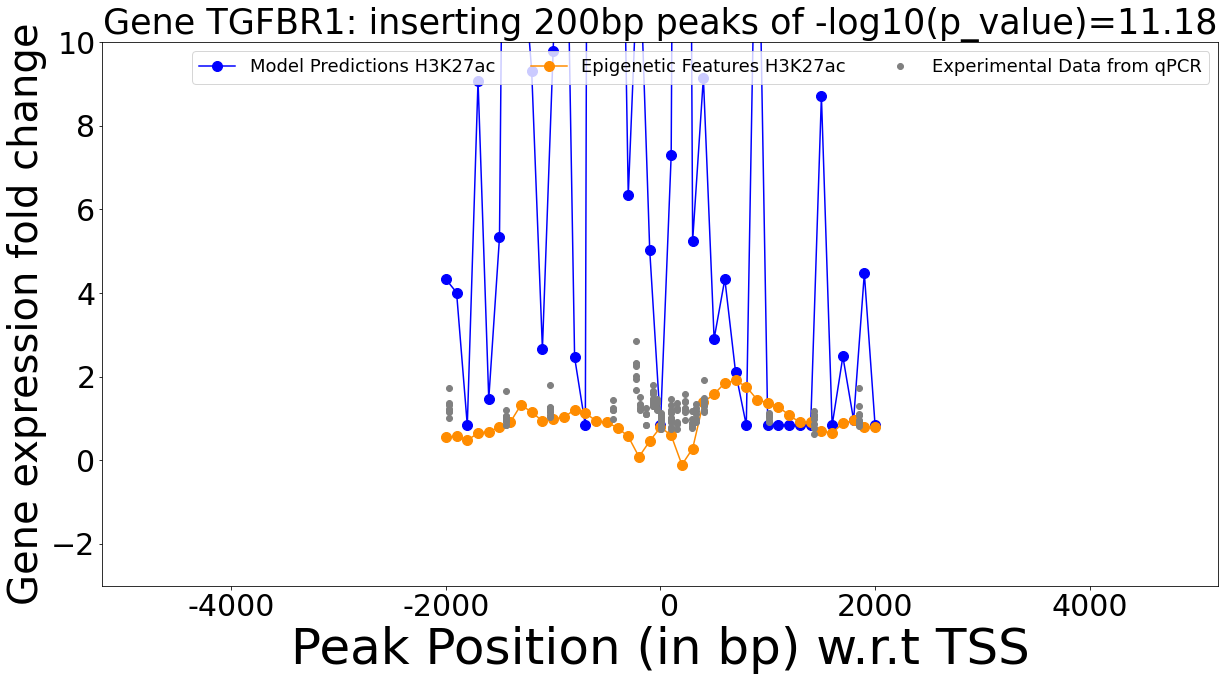

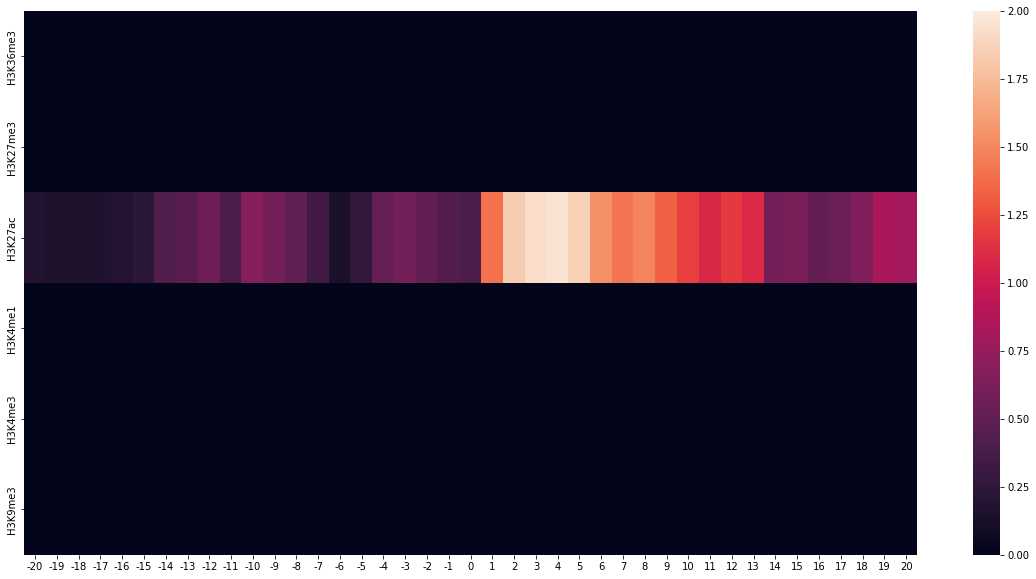

/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator


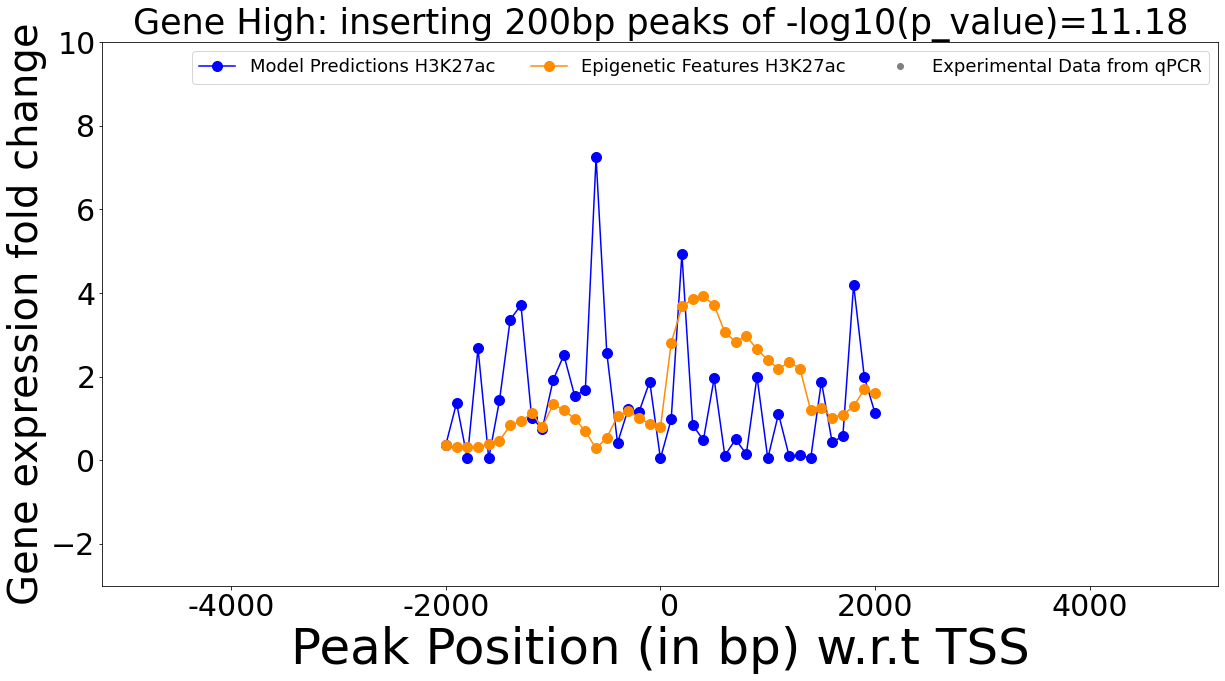

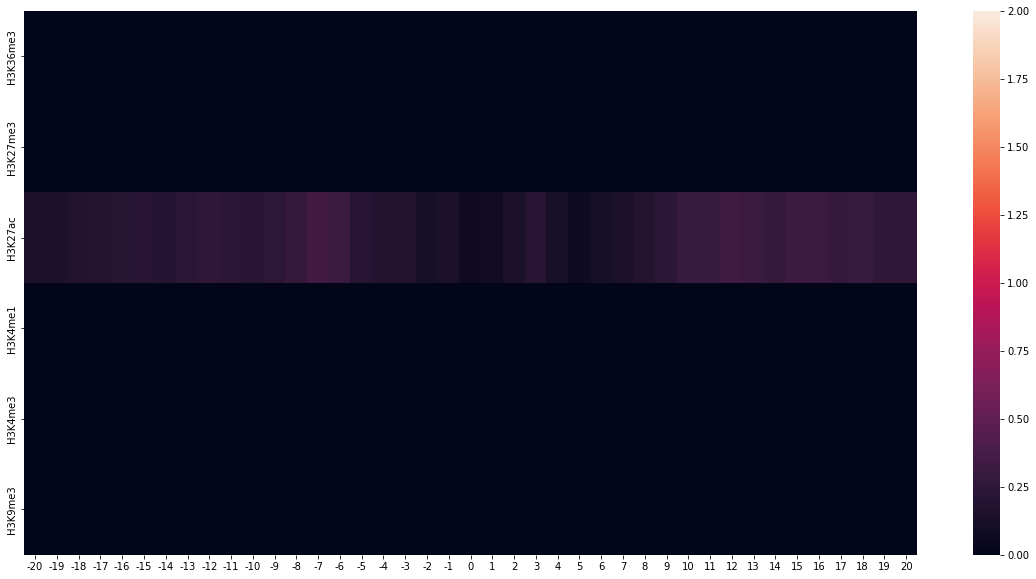

/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator


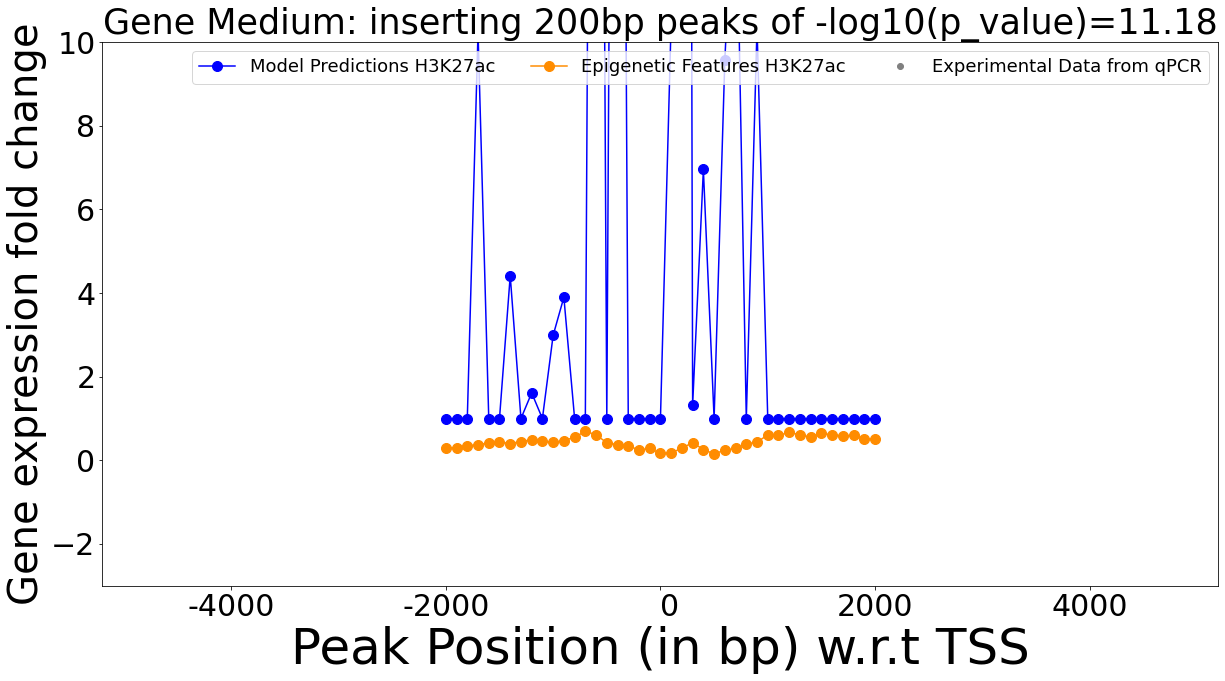

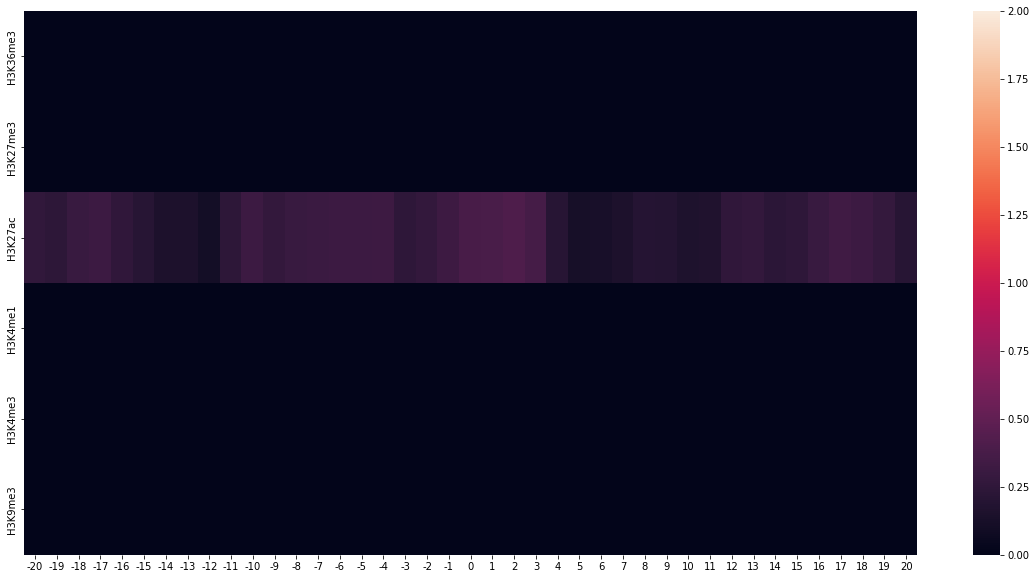

/export/home/users/sbatra/miniconda/yes/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator


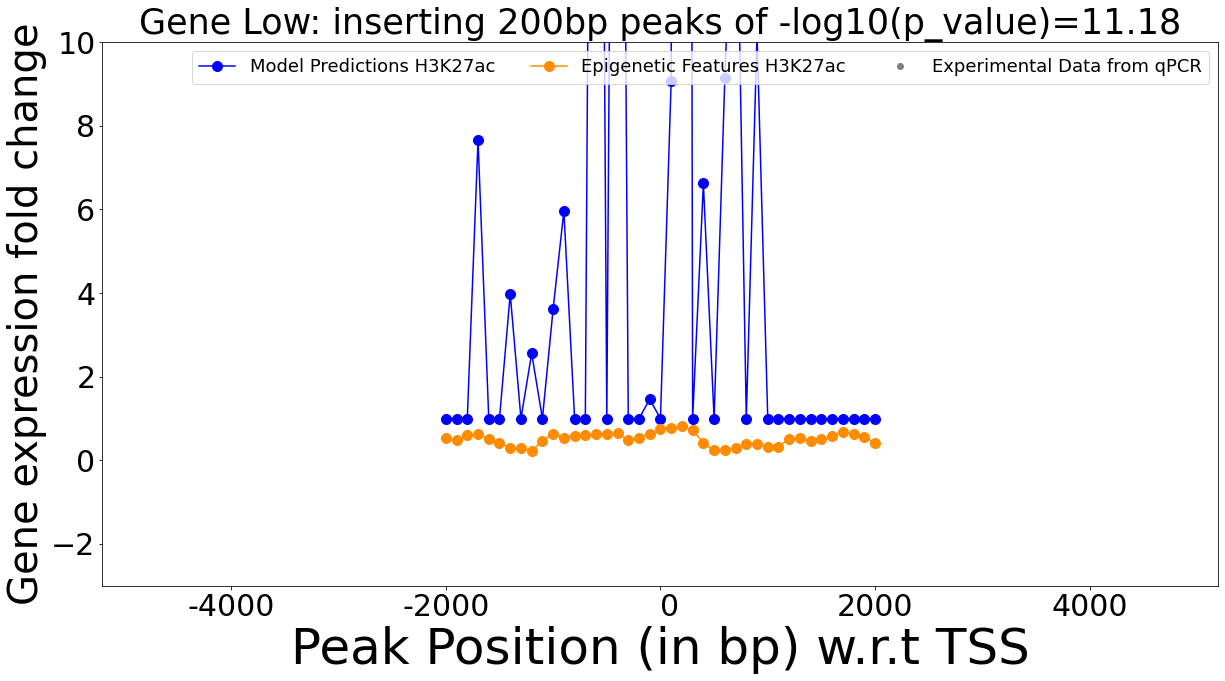

In [6]:
# Define in-silico epigenesis
def ise(gene, assay = 2, inserted_minuslog10p_value = 3, peak_width = 2):
    
    X = np.load(gene + ".npy")

    # Perform inference by introducing p-value changes with a peak width
    yPred = []
    center = window_size // 2
    positions = range(center - center, center + center + 1)
    for pos in positions:
        X_modified = np.copy(X)
        for p in range(pos - peak_width // 2, pos + peak_width // 2 + 1):
            if( (p>=0) and (p < max(positions)) ):
                X_modified[:, p, assay] = X_modified[:, p, assay] + inserted_minuslog10p_value
        yPred_value = trained_model.predict(X_modified)
        yy = yPred_value[0][0]
        yPred.append(yy)
    
    # Instead of scaling, divide by yPred
    yPred_value = trained_model.predict(X)[0][0]
    yPred = (np.power(10, yPred) -1) / (np.power(10, yPred_value) -1)

    return yPred


def p_value_mapping(inserted_minuslog10p_value):
    minuslog10p_value = np.expm1(inserted_minuslog10p_value)
    p_value = np.power(10, -1 * minuslog10p_value)
    return round(minuslog10p_value, 2)


assays = ['H3K36me3', 'H3K27me3', 'H3K27ac', 'H3K4me1', 'H3K4me3', 'H3K9me3']
def assay_name(assay):
    return assays[assay]


#Perform in-silico epigenesis
genes = ["CXCR4", "TGFBR1", "High", "Medium", "Low"]
assay_color = ['red', 'green', 'blue', 'cyan', 'pink', 'brown']
xticklabels = range(-(window_size // 2), (window_size // 2) + 1)
for gene in genes:

    gene_features = np.squeeze(np.load(gene+".npy"), axis=0)
    plt.rcParams["figure.figsize"] = (20, 10)
    plt.figure(0)
    ax = sns.heatmap(np.transpose(gene_features), annot=False, fmt="f",
                     vmin=0.0, vmax=2.0,
                     yticklabels=assays, xticklabels=xticklabels)
    plt.show()
    plt.close()

    for assay in range(2, 3):

        if(gene == 'CXCR4'):
            df = df_CXCR4_values
        elif(gene == 'TGFBR1'):
            df = df_TGFBR1_values
        else:
            df = df_CXCR4_values.iloc[0:0,:].copy()

        inserted_minuslog10p_value = 2.5
        peak_width = 2
        gene_ise = ise(gene, assay, inserted_minuslog10p_value, peak_width)

        plt.figure(1)
        plt.plot(xticklabels, 1.0 * gene_ise, 'o-', color=assay_color[assay], markersize=10, label="Model Predictions " + assay_name(assay))
        plt.plot(xticklabels, 2.0 * np.transpose(gene_features[:, assay]), 'o-', color='darkorange', markersize=10, label="Epigenetic Features " + assay_name(assay))
    plt.plot(df['Position_wrt_TSS'], df['Fold_Change'], 'o', color='gray', label="Experimental Data from qPCR")
    plt.xlim(-52, 52)
    plt.ylim(-3, 10)
    ax=plt.gca() 
    x_vals = ax.axes.get_xticks()
    ax.set_xticklabels(['{:3.0f}'.format(x * 100) for x in x_vals])
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.tick_params(axis='both', which='minor', labelsize=30)
    plt.xlabel("Peak Position (in bp) w.r.t TSS", size=50)
    plt.ylabel("Gene expression fold change", size=40)
    plt.legend(loc=1, prop={'size': 18}, ncol=3)
    plt.title("Gene "+gene+": inserting " + str(peak_width * RESOLUTION) + "bp peaks of -log10(p_value)="+str(p_value_mapping(inserted_minuslog10p_value)), size=35)
    plt.show()
    plt.close()